## Mustafa Habibi

## Sprint 8. Unsupervised learning algorithms: Clustering

## Exercise 1
Download the attached dataset, of records of Facebook posts about Thailand, and rank the different records using the K-means algorithm.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# load dataset
df = pd.read_csv('Publicacions Facebook Thailandia.csv')

In [2]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(7050, 16)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
df['status_id'].duplicated().sum()

53

In [8]:
# Remove duplicate rows and update the DataFrame

df.drop_duplicates(subset='status_id', inplace=True)

In [46]:
df.isnull().sum().any()

False

In [47]:
df.isna().sum().any()

False

Description of the columns:

1. status_id: Unique identifier for each status update.

2. status_type: The type of status update, indicating whether it is a "photo" or a "video".

3. status_published: The date and time when the status update was published.

4. num_reactions: The number of reactions received for the status update.

5. num_comments: The number of comments received for the status update.

6. num_shares: The number of shares received for the status update.

7. num_likes: The number of "likes" received for the status update.

8. num_loves: The number of "loves" received for the status update.

9. num_wows: The number of "wows" received for the status update.

10. num_hahas: The number of "hahas" received for the status update.

11. num_sads: The number of "sads" received for the status update.

12. num_angrys: The number of "angrys" received for the status update.

13. Column1, Column2, Column3, Column4: Additional columns with unknown contents, potentially containing additional information or data related to the status updates.


## Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Split 'status_published' into 'date_published' and 'time_published' columns
df[['date_published', 'time_published']] = df['status_published'].str.split(' ', expand=True)

# Convert the 'date_published' column to datetime format
df['date_published'] = pd.to_datetime(df['date_published'])

# Convert the 'time_published' column to time format (without date)
df['time_published'] = pd.to_datetime(df['time_published'], format='%H:%M').dt.time


In [12]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,date_published,time_published
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,2018-04-22,06:00:00
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,2018-04-21,22:45:00
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,2018-04-21,06:17:00
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,2018-04-21,02:29:00
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,2018-04-18,03:22:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         6997 non-null   object        
 1   status_type       6997 non-null   object        
 2   status_published  6997 non-null   object        
 3   num_reactions     6997 non-null   int64         
 4   num_comments      6997 non-null   int64         
 5   num_shares        6997 non-null   int64         
 6   num_likes         6997 non-null   int64         
 7   num_loves         6997 non-null   int64         
 8   num_wows          6997 non-null   int64         
 9   num_hahas         6997 non-null   int64         
 10  num_sads          6997 non-null   int64         
 11  num_angrys        6997 non-null   int64         
 12  Column1           0 non-null      float64       
 13  Column2           0 non-null      float64       
 14  Column3           0 non-null 

In [14]:
# drop columns without and unnessesary data
df = df.drop(columns = ['status_id','Column1', 'Column2', 'Column3', 'Column4', 'status_published'], axis= 1)

In [15]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'status_type' column
df['encoded_status_type'] = le.fit_transform(df['status_type'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
numerical_columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the preprocessed DataFrame
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date_published,time_published,encoded_status_type
0,video,0.671339,0.320773,1.679078,0.505273,1.975729,0.200174,0.076009,0.518043,-0.160014,2018-04-22,06:00:00,3
1,photo,-0.165494,-0.252704,-0.304949,-0.136271,-0.318012,-0.143620,-0.175806,-0.157082,-0.160014,2018-04-21,22:45:00,1
2,video,0.004522,0.011633,0.126690,-0.013422,0.205560,-0.029022,0.076009,-0.157082,-0.160014,2018-04-21,06:17:00,3
3,photo,-0.251606,-0.252704,-0.304949,-0.224995,-0.318012,-0.143620,-0.175806,-0.157082,-0.160014,2018-04-21,02:29:00,1
4,photo,-0.026390,-0.252704,-0.304949,-0.013422,-0.093624,-0.143620,-0.175806,-0.157082,-0.160014,2018-04-18,03:22:00,1


In [16]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date_published,time_published,encoded_status_type
0,video,0.671339,0.320773,1.679078,0.505273,1.975729,0.200174,0.076009,0.518043,-0.160014,2018-04-22,06:00:00,3
1,photo,-0.165494,-0.252704,-0.304949,-0.136271,-0.318012,-0.143620,-0.175806,-0.157082,-0.160014,2018-04-21,22:45:00,1
2,video,0.004522,0.011633,0.126690,-0.013422,0.205560,-0.029022,0.076009,-0.157082,-0.160014,2018-04-21,06:17:00,3
3,photo,-0.251606,-0.252704,-0.304949,-0.224995,-0.318012,-0.143620,-0.175806,-0.157082,-0.160014,2018-04-21,02:29:00,1
4,photo,-0.026390,-0.252704,-0.304949,-0.013422,-0.093624,-0.143620,-0.175806,-0.157082,-0.160014,2018-04-18,03:22:00,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   status_type          6997 non-null   object        
 1   num_reactions        6997 non-null   float64       
 2   num_comments         6997 non-null   float64       
 3   num_shares           6997 non-null   float64       
 4   num_likes            6997 non-null   float64       
 5   num_loves            6997 non-null   float64       
 6   num_wows             6997 non-null   float64       
 7   num_hahas            6997 non-null   float64       
 8   num_sads             6997 non-null   float64       
 9   num_angrys           6997 non-null   float64       
 10  date_published       6997 non-null   datetime64[ns]
 11  time_published       6997 non-null   object        
 12  encoded_status_type  6997 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int3

In [18]:
from scipy import stats
print('Null hypothesis H0, the sample has a normal distribution, It is Guessian')
print('Alternative hypothesis H1, the sample does not  have a normal distribution, It is not Guessian')


columns= df[['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

for i in columns:
    shapiro_test = stats.shapiro(df[i])
    print('For the variable ', i, 'with a p-value of ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('We cannot reject the null hypothesis, It is Guessian')
    else:
        print('We can reject the null hypothesis, It is not Guessian')

Null hypothesis H0, the sample has a normal distribution, It is Guessian
Alternative hypothesis H1, the sample does not  have a normal distribution, It is not Guessian
For the variable  num_reactions with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_comments with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_shares with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_likes with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_loves with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_wows with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_hahas with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_sads with a p-value of  0.0
We can reject the null hypothesis, It is

In [19]:
# I want to find out all variables with outliers:
def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3 - q1
   outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
   return outliers


outliers = find_outliers_IQR(columns)

print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

number of outliers: 6997
max outlier value: num_reactions     9.903004
num_comments     23.257619
num_shares       25.623714
num_likes        10.237637
num_loves        16.062287
num_wows         31.714650
num_hahas        39.359057
num_sads         34.274326
num_angrys       44.856991
dtype: float64
min outlier value: num_reactions    0.640427
num_comments    -0.189980
num_shares      -0.221650
num_likes        0.502998
num_loves       -0.118556
num_wows        -0.029022
num_hahas        0.076009
num_sads         0.518043
num_angrys       1.292148
dtype: float64


In [20]:
# Columns with outliers:
outlier_columns = outliers.columns[outliers.any()]
print("Columns with outliers:", ', '.join(outlier_columns))

Columns with outliers: num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys


In [21]:
# Columns without outliers:
non_outlier_columns = outliers.columns[~outliers.any()]
print("Columns without outliers:", ', '.join(non_outlier_columns))

Columns without outliers: 


In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

trans = preprocessing.RobustScaler()
df[['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']] = trans.fit_transform(df[['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']])
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date_published,time_published,encoded_status_type
0,video,2.366834,23.090909,65.50,2.272727,30.666667,0.343794,0.251814,0.675126,0.0,2018-04-22,06:00:00,3
1,photo,0.462312,-0.181818,0.00,0.563636,0.000000,0.000000,0.000000,0.000000,0.0,2018-04-21,22:45:00,1
2,video,0.849246,10.545455,14.25,0.890909,7.000000,0.114598,0.251814,0.000000,0.0,2018-04-21,06:17:00,3
3,photo,0.266332,-0.181818,0.00,0.327273,0.000000,0.000000,0.000000,0.000000,0.0,2018-04-21,02:29:00,1
4,photo,0.778894,-0.181818,0.00,0.890909,3.000000,0.000000,0.000000,0.000000,0.0,2018-04-18,03:22:00,1


In [25]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date_published,time_published,encoded_status_type
0,video,2.366834,23.090909,65.50,2.272727,30.666667,0.343794,0.251814,0.675126,0.0,2018-04-22,06:00:00,3
1,photo,0.462312,-0.181818,0.00,0.563636,0.000000,0.000000,0.000000,0.000000,0.0,2018-04-21,22:45:00,1
2,video,0.849246,10.545455,14.25,0.890909,7.000000,0.114598,0.251814,0.000000,0.0,2018-04-21,06:17:00,3
3,photo,0.266332,-0.181818,0.00,0.327273,0.000000,0.000000,0.000000,0.000000,0.0,2018-04-21,02:29:00,1
4,photo,0.778894,-0.181818,0.00,0.890909,3.000000,0.000000,0.000000,0.000000,0.0,2018-04-18,03:22:00,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   status_type          6997 non-null   object        
 1   num_reactions        6997 non-null   float64       
 2   num_comments         6997 non-null   float64       
 3   num_shares           6997 non-null   float64       
 4   num_likes            6997 non-null   float64       
 5   num_loves            6997 non-null   float64       
 6   num_wows             6997 non-null   float64       
 7   num_hahas            6997 non-null   float64       
 8   num_sads             6997 non-null   float64       
 9   num_angrys           6997 non-null   float64       
 10  date_published       6997 non-null   datetime64[ns]
 11  time_published       6997 non-null   object        
 12  encoded_status_type  6997 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int3

### Visualization

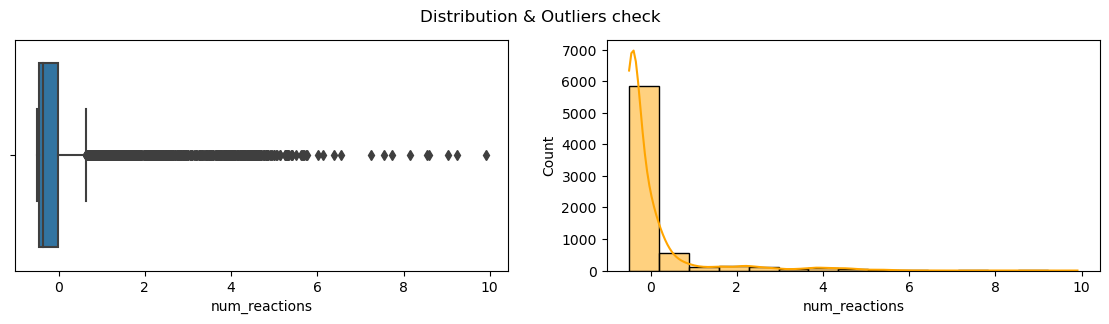

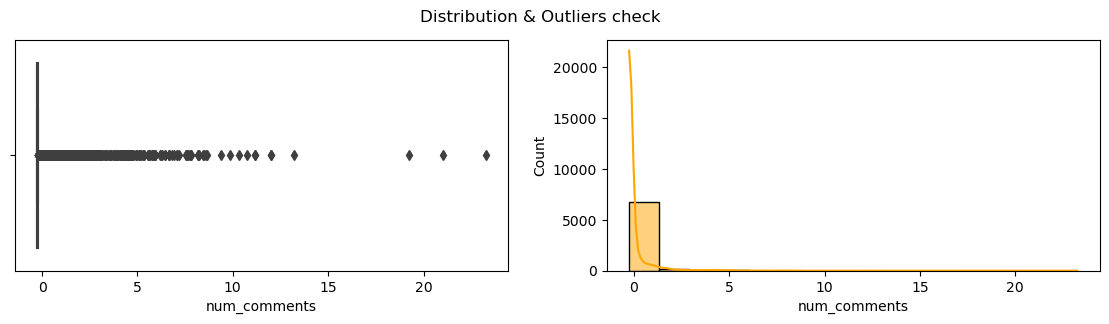

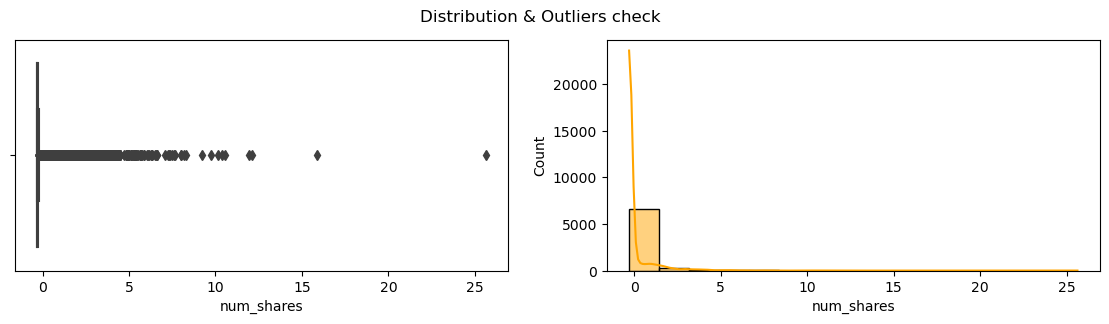

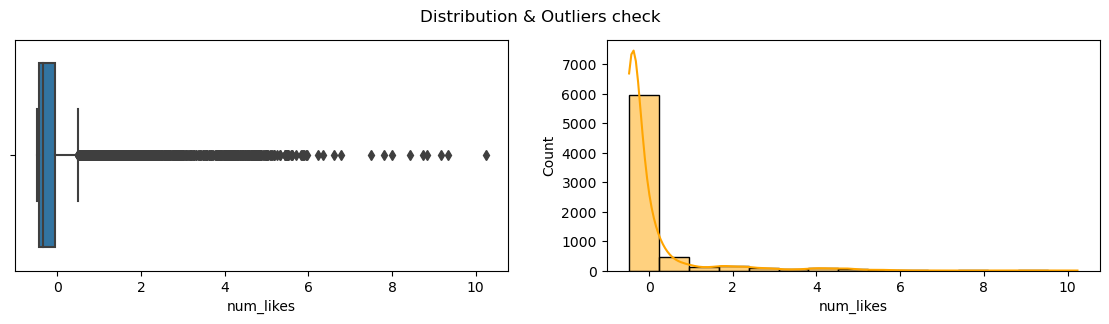

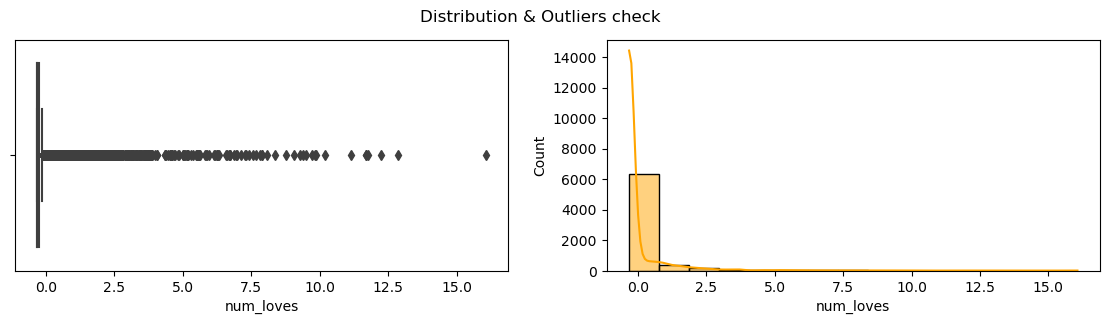

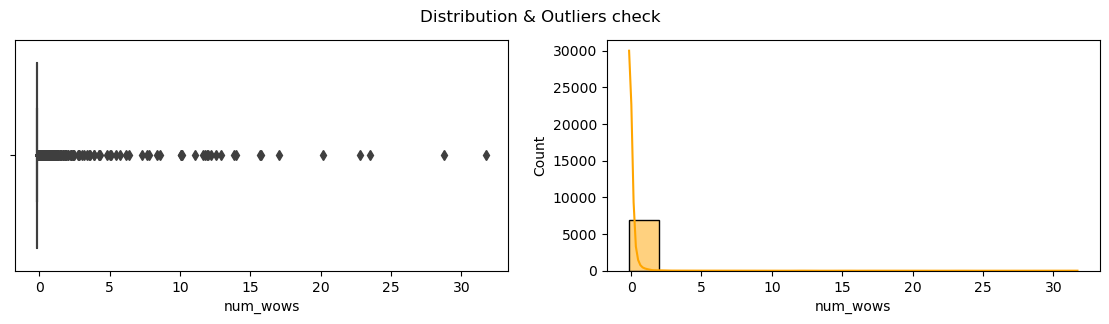

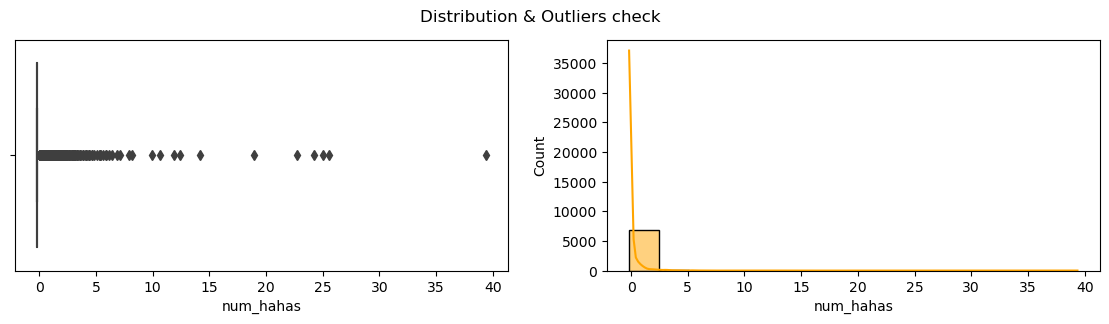

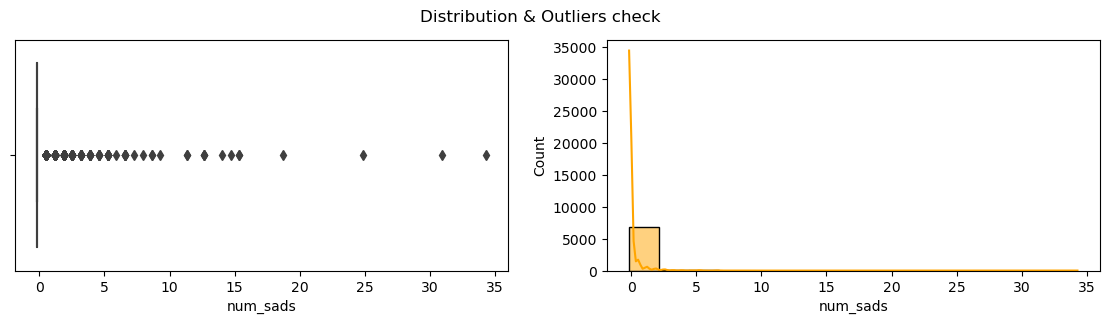

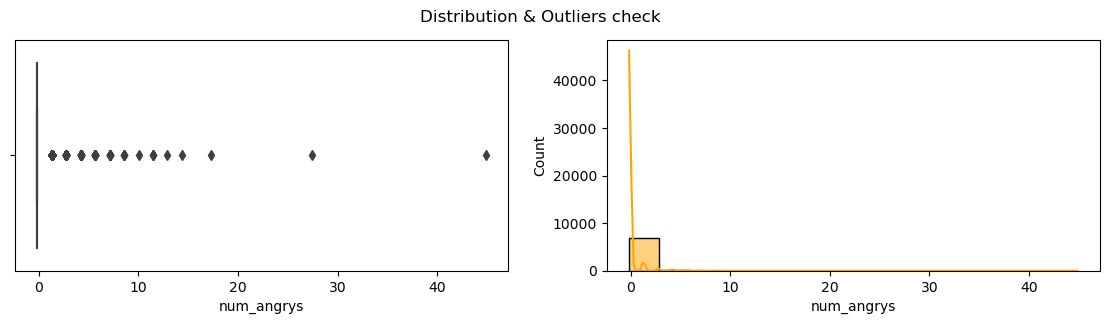

In [27]:
for column in columns:
    fig, axes = plt.subplots(1,2, figsize = (14,3))
    fig.suptitle('Distribution & Outliers check')
    sns.histplot(ax=axes[1], data=columns, x=columns[column], bins=15, color='orange', kde= True)
    sns.boxplot(ax=axes[0], x =columns[column])

plt.show()

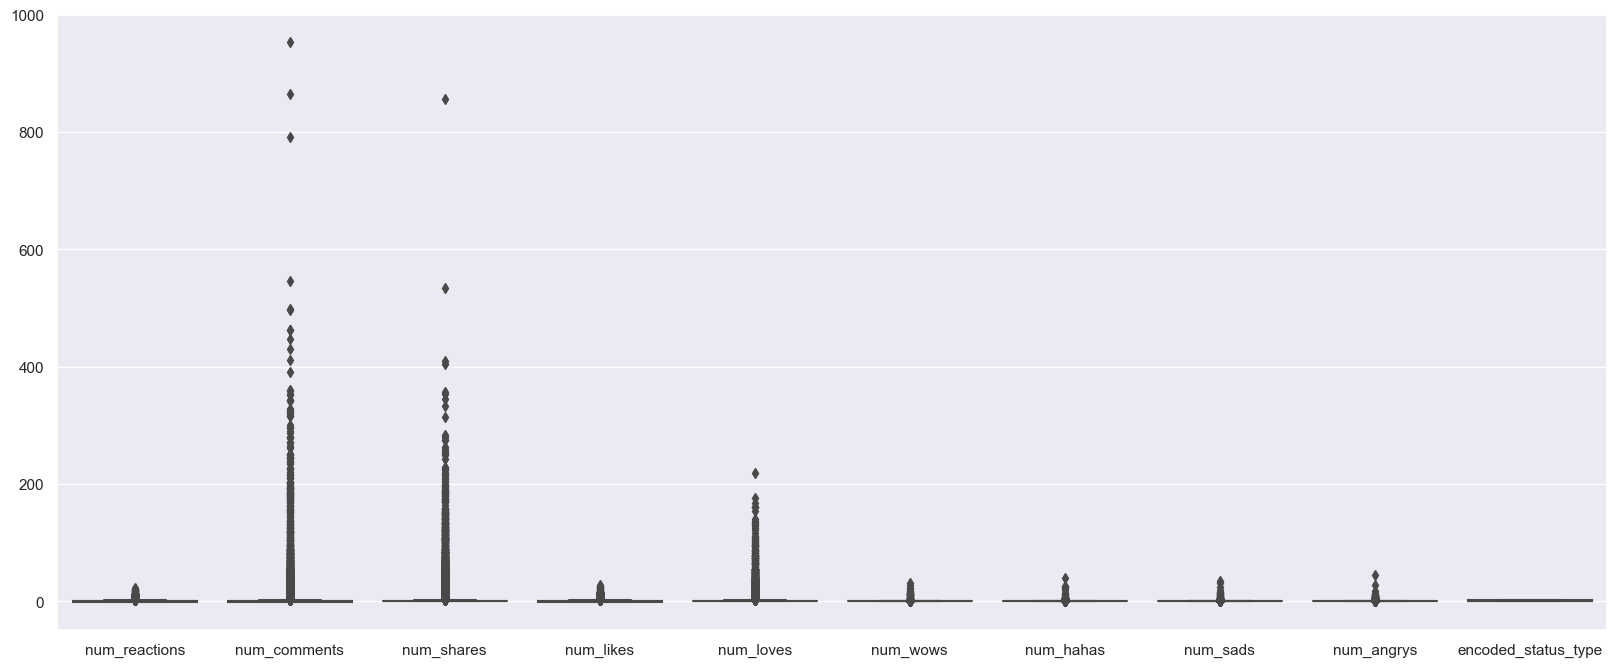

In [28]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(data=df)

plt.show()

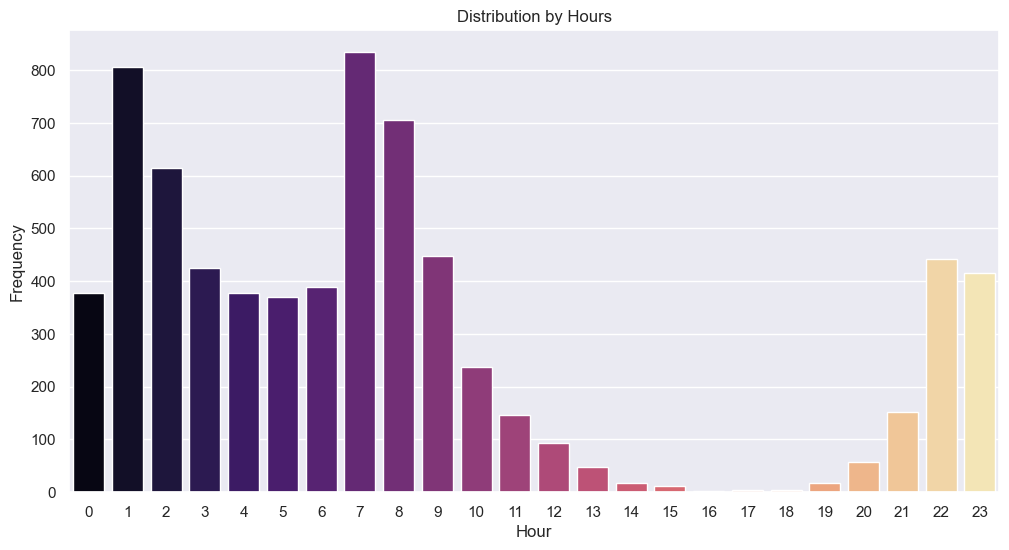

In [29]:
# Get the frequencies
hour_counts = df.groupby(df['time_published'].apply(lambda x: x.hour)).size()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='magma')  # Change 'magma' to the desired color palette

# Configure the labels
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Distribution by Hours')

# Show the plot
plt.show()


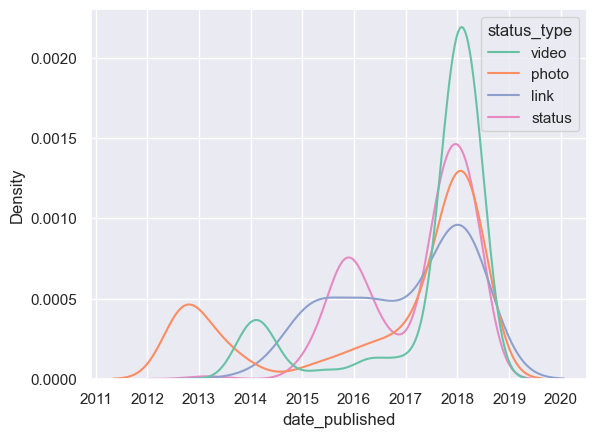

In [30]:
# We can also visualize the progression of status types over the years

# Plot the KDE plot with the 'date_published' on the x-axis, hue='status_type', and using 'Set2' color palette
sns.kdeplot(x='date_published', hue='status_type', data=df, common_norm=False, palette="Set2")

# Set the figure size
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Display the plot
plt.show()


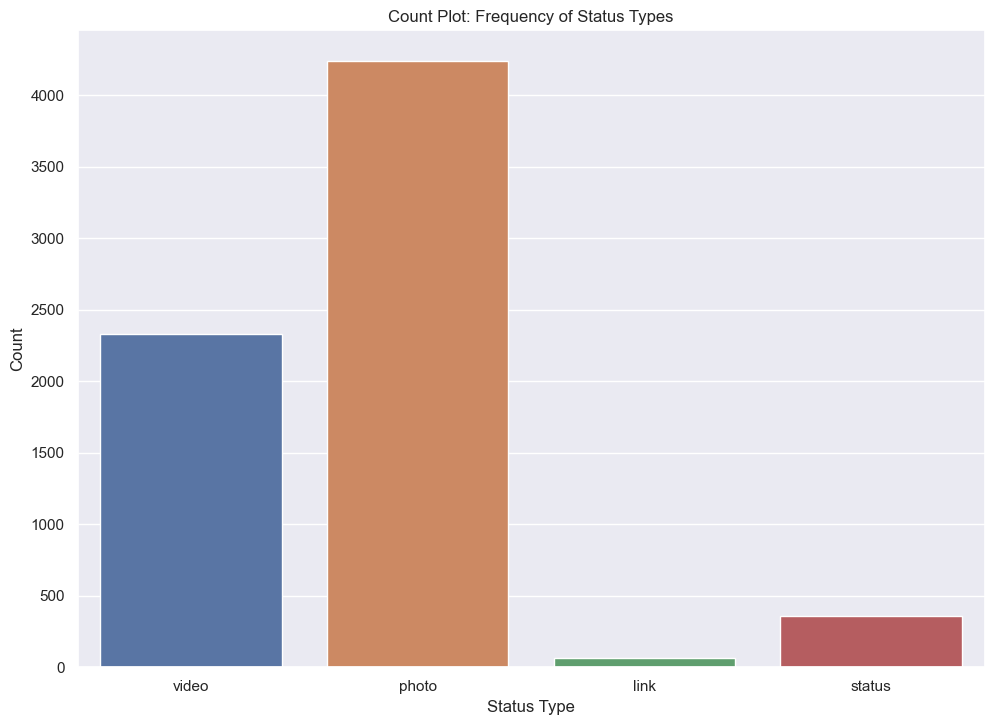

In [31]:
sns.countplot(x='status_type', data=df)
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.title('Count Plot: Frequency of Status Types')
plt.show()

In [32]:
# Perform dummy encoding on the 'status_type' column
df= pd.get_dummies(df, columns=['status_type']) #drop_first=True)

# Convert boolean columns to 0 and 1
df['status_type_photo'] = df['status_type_photo'].astype(int)
df['status_type_status'] = df['status_type_status'].astype(int)
df['status_type_video'] = df['status_type_video'].astype(int)

df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date_published,time_published,encoded_status_type,status_type_link,status_type_photo,status_type_status,status_type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,0.343794,0.251814,0.675126,0.0,2018-04-22,06:00:00,3,False,0,0,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.000000,0.000000,0.000000,0.0,2018-04-21,22:45:00,1,False,1,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,0.114598,0.251814,0.000000,0.0,2018-04-21,06:17:00,3,False,0,0,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.000000,0.000000,0.000000,0.0,2018-04-21,02:29:00,1,False,1,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.000000,0.000000,0.000000,0.0,2018-04-18,03:22:00,1,False,1,0,0


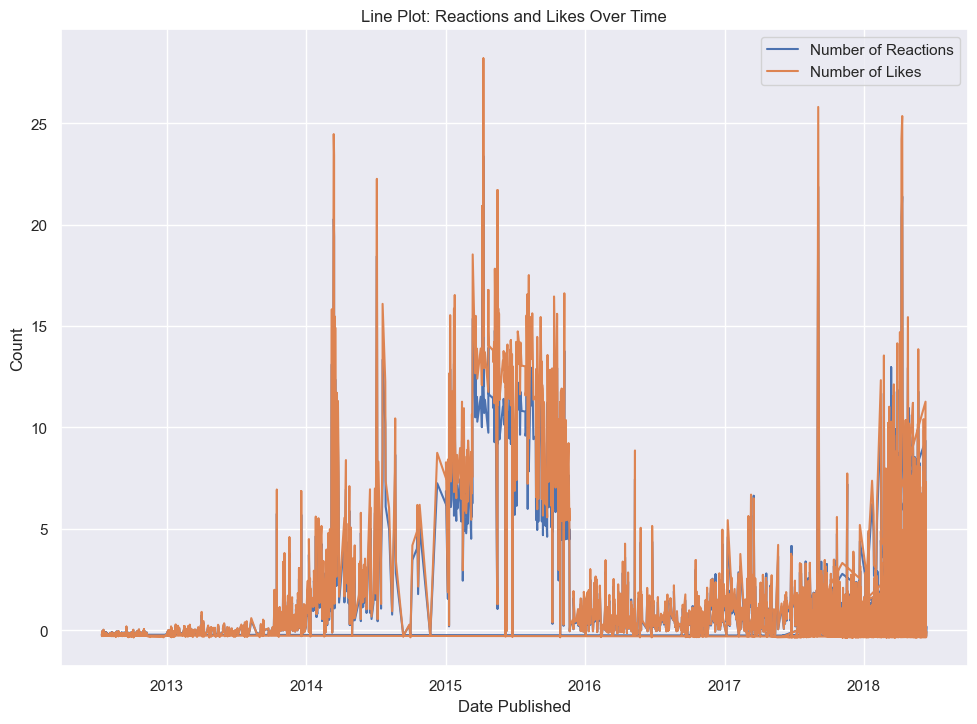

In [33]:
plt.plot(df['date_published'], df['num_reactions'], label='Number of Reactions')
plt.plot(df['date_published'], df['num_likes'], label='Number of Likes')
plt.xlabel('Date Published')
plt.ylabel('Count')
plt.title('Line Plot: Reactions and Likes Over Time')
plt.legend()
plt.show()


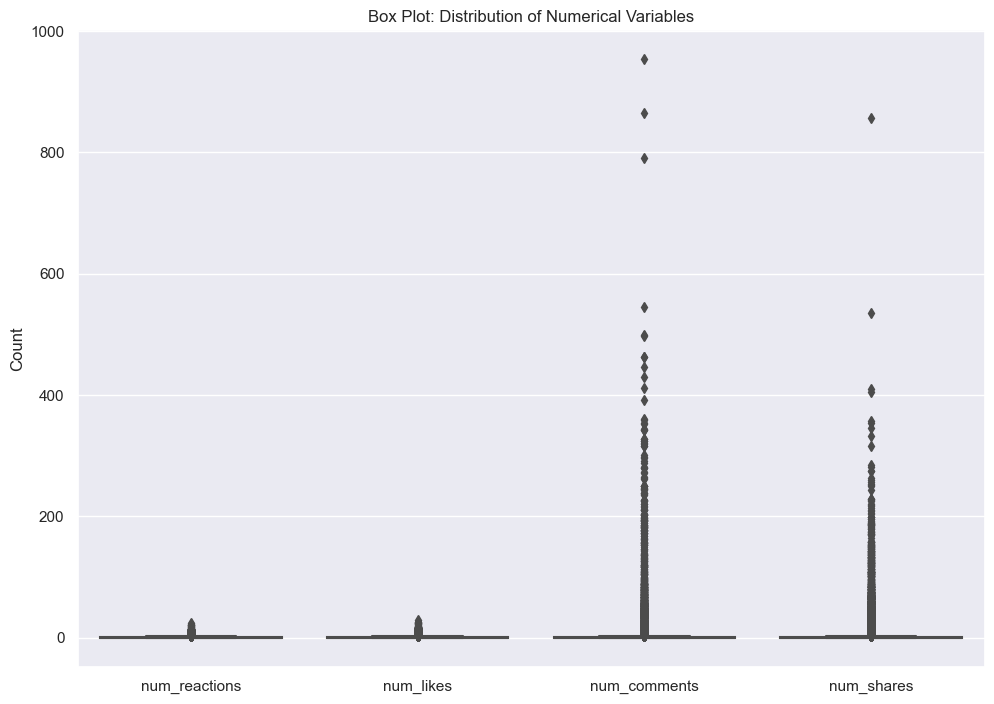

In [34]:
sns.boxplot(data=df[['num_reactions', 'num_likes', 'num_comments', 'num_shares']])
plt.ylabel('Count')
plt.title('Box Plot: Distribution of Numerical Variables')
plt.show()


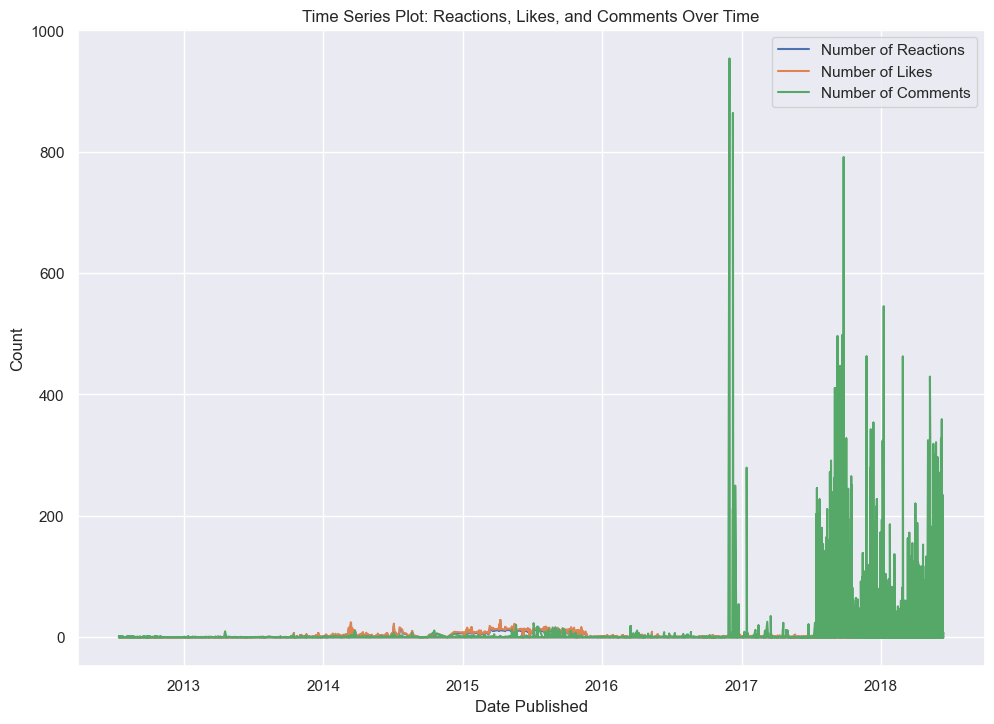

In [35]:
plt.plot(df['date_published'], df['num_reactions'], label='Number of Reactions')
plt.plot(df['date_published'], df['num_likes'], label='Number of Likes')
plt.plot(df['date_published'], df['num_comments'], label='Number of Comments')
plt.xlabel('Date Published')
plt.ylabel('Count')
plt.title('Time Series Plot: Reactions, Likes, and Comments Over Time')
plt.legend()
plt.show()


## PCA

In [36]:
from sklearn.decomposition import PCA

# Assuming your preprocessed DataFrame is named 'df'
# Separate the features from the target variable (if you have one) and other non-relevant columns
X = df.drop(['date_published', 'time_published'], axis=1)

# Apply PCA with the desired number of components (let's say n_components = 2)
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the PCA components
pca_columns = [f'PCA_{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=X_pca, columns=pca_columns)


# Display the DataFrame with PCA components
df_pca.head()


,PCA_1,PCA_2
0,48.049070,39.987131
1,-14.819689,-2.230707
2,3.385022,3.548774
3,-14.823737,-2.237086
4,-14.216073,-1.384352


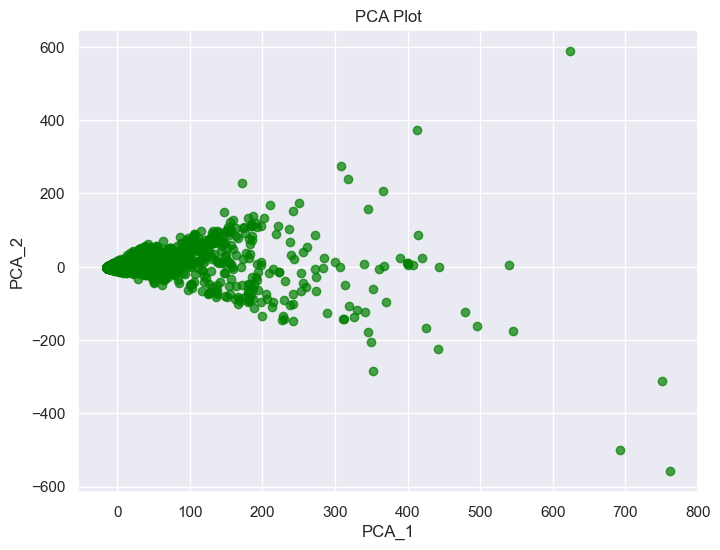

In [37]:
import matplotlib.pyplot as plt

# Assuming 'pca_df' is your DataFrame with the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA_1'], df_pca['PCA_2'], alpha=0.7, color= 'green')

# Add labels and title
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA Plot')

# Show the plot
plt.show()



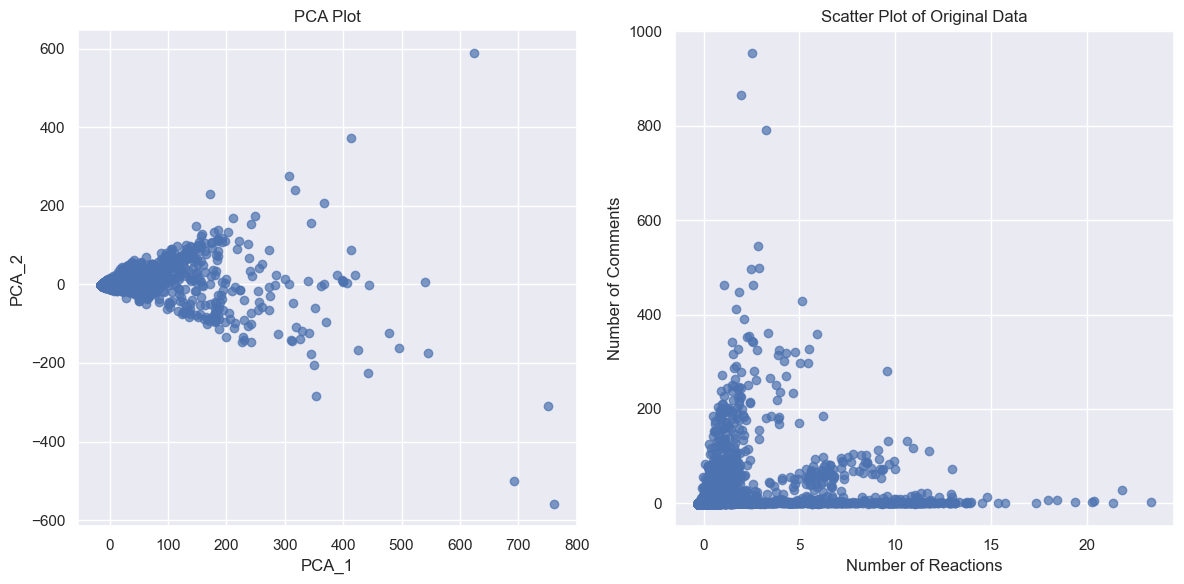

In [38]:
plt.figure(figsize=(12, 6))

# Subplot 1 - PCA Plot
plt.subplot(1, 2, 1)
plt.scatter(df_pca['PCA_1'], df_pca['PCA_2'], alpha=0.7)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA Plot')

# Subplot 2 - Scatter plot of original data
plt.subplot(1, 2, 2)
plt.scatter(df['num_reactions'], df['num_comments'], alpha=0.7)
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.title('Scatter Plot of Original Data')

# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


## K-means

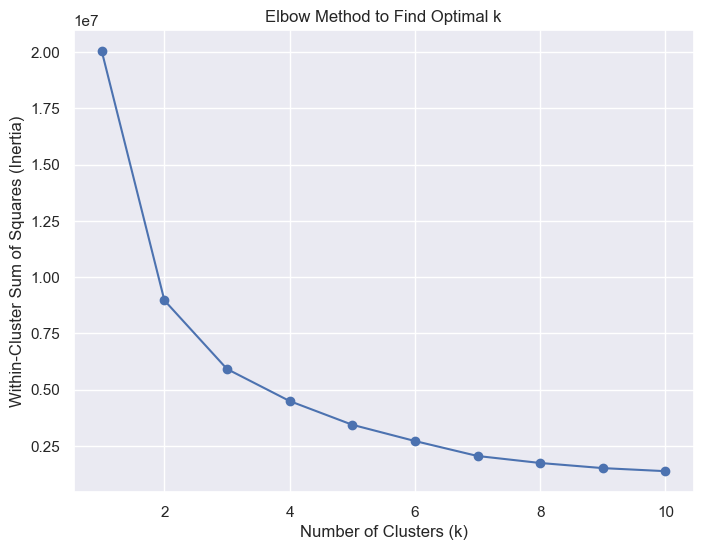

In [39]:
from sklearn.cluster import KMeans

# Create a list to store the inertia values for different values of k
inertia = []

# Define the range of k values to try
k_values = range(1, 11)

# Fit KMeans models for each value of k and compute inertia
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(df_pca[['PCA_1', 'PCA_2']])
    inertia.append(kmeans_model.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method to Find Optimal k')
plt.show()


Accourding the Elbo methon above, the aproperiate cluster number is 3.

In [40]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model to the data
kmeans_model.fit(df_pca[['PCA_1', 'PCA_2']])

# Add the cluster labels to your DataFrame
df_pca['Cluster'] = kmeans_model.labels_

# Print the count of data points in each cluster
print(df_pca['Cluster'].value_counts())


Cluster
0    6357
1     535
2     105
Name: count, dtype: int64


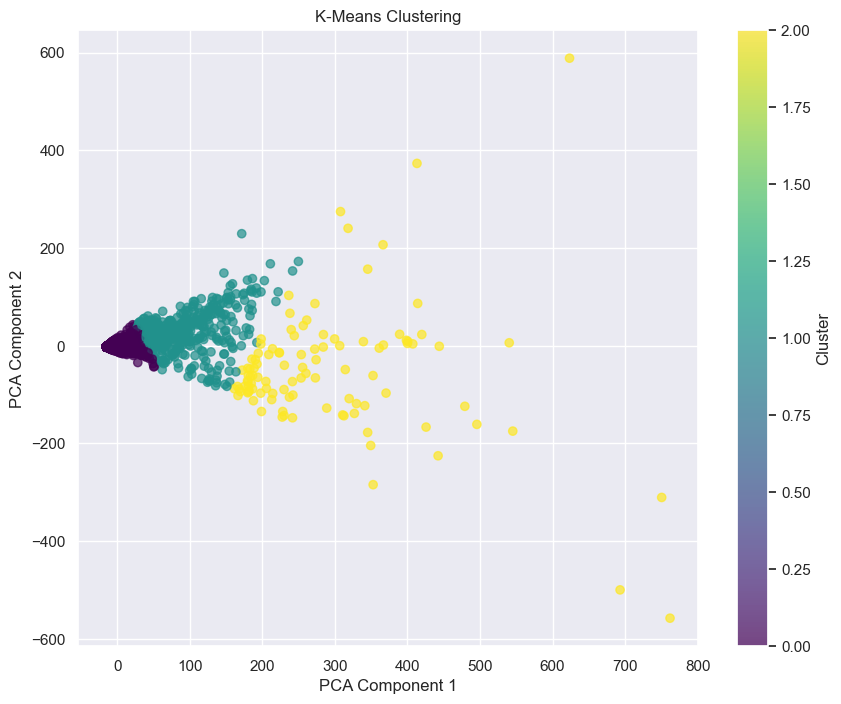

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PCA_1'], df_pca['PCA_2'], c=kmeans_model.labels_, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

1. Cluster 0: This cluster is the largest one with 6357 data points. It suggests that the majority of your data points share similar characteristics and are grouped together in this cluster. The high number of data points in Cluster 0 indicates that there might be a dominant pattern or common behavior among these data points.

2. Cluster 1: This cluster contains 535 data points, which is significantly smaller compared to Cluster 0. It indicates that there is a subset of data points that exhibit different characteristics from those in Cluster 0. Cluster 1 might represent a distinct subgroup or pattern within your data.

3. Cluster 2: This cluster is the smallest one with only 105 data points. It suggests that there is a small group of data points that are very different from the rest of the data. Cluster 2 might represent outliers or data points with unique properties that don't fit well with the majority of the data.

Interpretation:
The K-means algorithm has clustered your data into three groups based on their features. Cluster 0 represents the majority of the data points, Cluster 1 represents a smaller but distinct subgroup, and Cluster 2 contains a few data points with unique properties.

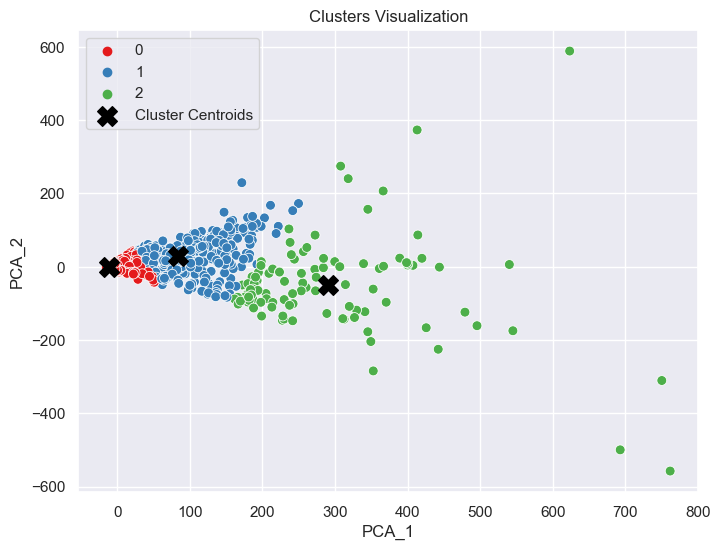

              PCA_1      PCA_2
Cluster                       
0        -11.784829  -1.590860
1         83.168345  28.828674
2        289.724697 -50.573748


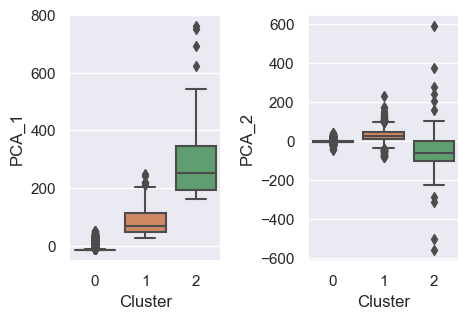

In [42]:
# Calculate the centroid (mean) values for each feature within each cluster
cluster_centroids = df_pca.groupby('Cluster').mean()

# Visualize the clusters in a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA_1', y='PCA_2', hue='Cluster', palette='Set1', s=50)
plt.scatter(cluster_centroids['PCA_1'], cluster_centroids['PCA_2'], marker='X', s=200, color='black', label='Cluster Centroids')
plt.legend()
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('Clusters Visualization')
plt.show()

# Compare the mean values of each feature across clusters
print(cluster_centroids)

# Perform visualizations to compare feature distributions across clusters
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df_pca.columns[:-1]):
    plt.subplot(2, 5, i+1)
    sns.boxplot(data=df_pca, x='Cluster', y=feature)
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


### Exercise 2
Sort the different records using the hierarchical clustering algorithm.

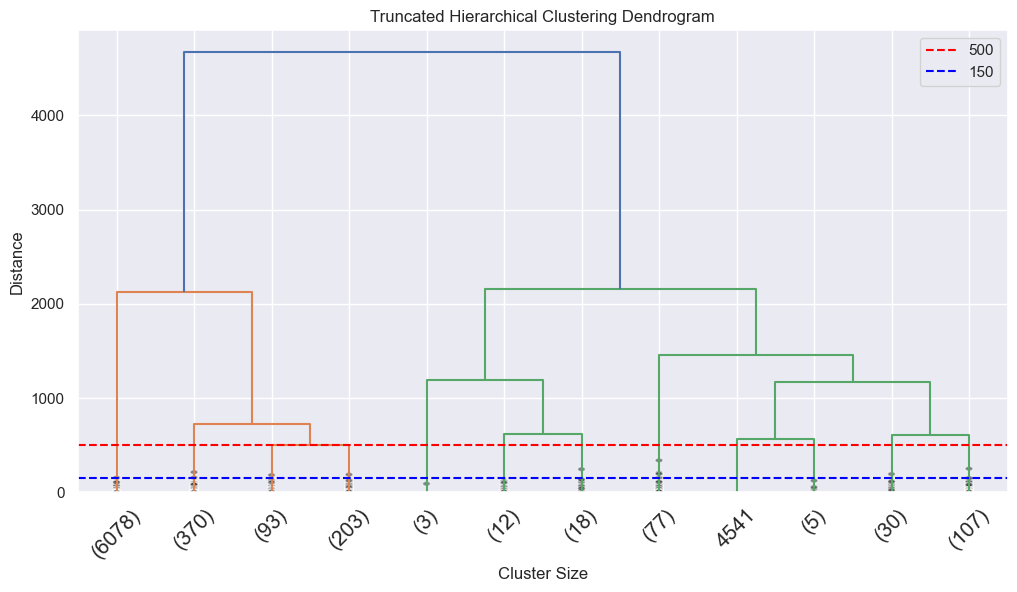

In [43]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(df_pca, method='ward')

# Create the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

# Add titles and labels
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Add horizontal lines at y=500 and y=150
plt.axhline(y=500, color='red', linestyle='--', label='500')
plt.axhline(y=150, color='blue', linestyle='--', label='150')

# Show the legend
plt.legend()

# Show the plot
plt.show()


**Cluster Heights and Mergers:**
Cluster mergers are shown as branch unions in the dendrogram. The height of each merger indicates the distance or dissimilarity between the merged clusters. Mergers that occur at a higher altitude indicate greater dissimilarity between the clusters. In other words, the taller the branch, the more different the clusters are from each other.

**Horizontal Distance:**
The horizontal distances between cluster mergers indicate the distance or dissimilarity between them. The greater the horizontal distance, the greater the dissimilarity between the merged clusters. These horizontal distances are useful in understanding the relationships between clusters and their dissimilarity levels.

**Horizontal Lines:**
On the dendrogram, horizontal lines can be added to help determine the proper number of clusters. These lines may represent distance or dissimilarity thresholds. In this case, two horizontal lines have been drawn at distance values 500 and 150. These lines can serve as cutoff points to identify the number of clusters. The points where the dendrogram intersects these lines represent potential cluster solutions.

**Collapsed Branches:**
The `truncate_mode` parameter is set to 'lastp' to collapse the branches of the dendrogram when a certain number of clusters is reached. In this case, it's set to 12, which means that the branches that result in 12 clusters are collapsed for easier viewing. This truncation allows us to focus on a specific range of clusters and understand their relationships.

---

Using the dendrogram, you can visually inspect the height of mergers, the horizontal distances, and the number of clusters formed at different cutoff points. This analysis will help you make informed decisions about the appropriate number of clusters for your data.

## Exercise 3
Calculate the clustering performance using a parameter such as silhouette.

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming 'df_pca' is your DataFrame with PCA results and 'num_clusters' is the desired number of clusters
agglomerative_model = AgglomerativeClustering(n_clusters=num_clusters)
clusters = agglomerative_model.fit_predict(df_pca[['PCA_1', 'PCA_2']])

silhouette_avg = silhouette_score(df_pca[['PCA_1', 'PCA_2']], clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.8907279353216967


The score of 0.8907 suggests that the clusters are well-separated and data points are appropriately assigned to their respective clusters, indicating a strong clustering structure in the data. This means that the hierarchical clustering algorithm was able to identify meaningful patterns and group similar data points together.